<a href="https://colab.research.google.com/github/Guilherme1978/data-science-from-scratch/blob/master/Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#distribuição binomial

In [30]:
from scipy.stats import binom

In [31]:
x=3 #casos de sucesso
p=0.5 #cfavoráveis
n=5 # quantidade de caso
binom.pmf(x,n,p)

0.3125

In [32]:
# passar por 4 sinais de 4 tempos, qual a probabilidade de eu pegar 0,1,2,3,4
x=[0,1,2,3,4] # número de casos de sucesso
p=0.25 #casos favoráveis
n=4 # quantidade de caso
binom.pmf(x,n,p)

array([0.31640625, 0.421875  , 0.2109375 , 0.046875  , 0.00390625])

In [34]:
# Concurso com 12 questões, qual a probabilidade de acertar 7 questões considerando que 
# cada questão tem 4 alternativas?
x=7 # número de casos de sucesso
p=0.25 #casos favoráveis
n=12 # quantidade de casos
binom.pmf(x,n,p)*100

1.1471271514892574

# Distribuição Normal

In [35]:
from scipy.stats import norm

In [ ]:
# Existe um conjunto de objetos em uma cesta, cujos pesos são normalmente
#distribuídos com média = 8 e desvio padrão igual a 2. 
#1. Qual a chance de se tirar um objeto pesando menosde 6 quilos?

In [37]:
# peso menor que 6
media =8
dp = 2
evento = 6
norm.cdf(evento,media,dp)*100

15.865525393145708

In [41]:
# peso maior que 6
media =8
dp = 2
evento = 6
norm.sf(evento, media,dp)
1 - norm.cdf(evento,media,dp)

0.8413447460685429

In [54]:
dados = pd.read_csv('AirPassengers.csv')
dados.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [53]:
from datetime import datetime
#função para converter data(texto) para data(datatime)
data='2021-08'
convert_data = lambda data: datetime.strptime(data,"%Y-%m")
dados.Month.apply(convert_data)


0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [57]:
dados=pd.read_csv('AirPassengers.csv', parse_dates=['Month'],
                  date_parser=convert_data, index_col='Month')
dados

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [67]:
dados[:1]

,#Passengers
Month,
1949-01-01,112


In [69]:
serie_temporal = dados['#Passengers']
serie_temporal

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [73]:
serie_temporal['1956-11']
serie_temporal[datetime(1955,12,1)]
serie_temporal['1956-11':'1957-11']
serie_temporal['1956']

Month
1956-01-01    284
1956-02-01    277
1956-03-01    317
1956-04-01    313
1956-05-01    318
1956-06-01    374
1956-07-01    413
1956-08-01    405
1956-09-01    355
1956-10-01    306
1956-11-01    271
1956-12-01    306
Name: #Passengers, dtype: int64

In [74]:
dados.index.min(),dados.index.max(),

(Timestamp('1949-01-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

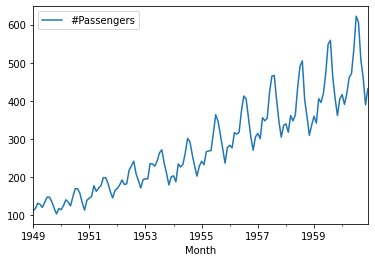

In [79]:
import matplotlib.pyplot as plt

dados.plot()
plt.plot(dados)

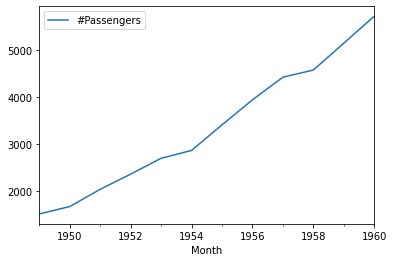

In [83]:
#plt.plot(dados.loc['1950:01':'1950-12',:])
dados.resample('A').sum().plot()

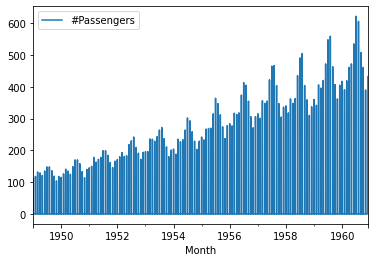

In [85]:
dados.resample('A').sum().plot()

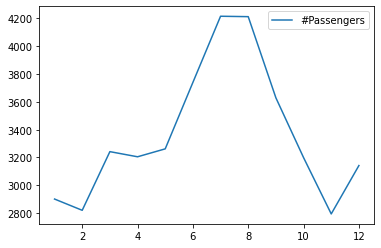

In [88]:
dados.groupby([lambda x: x.month]).sum().plot()